In [2]:
#load needed packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) #set the tick and labelsizes for the figure drawing

In [13]:
#data loading
supercluster_mrna = pd.read_csv( "../files/Supercluster_excel/Supercluster_iPSC_network_mRNA_all_zelllines.csv").reset_index().set_index("external_gene_name")
supercluster_mirna = pd.read_csv("../files/Supercluster_excel/miR_superclustering.csv")
baseline_expression = pd.read_csv("../files/mirna_queried_trajectories/mean_baseline_expression_miRNA.csv")

In [4]:
#reduce mirna and mrna data 
supercluster_mirna = supercluster_mirna.set_index("Row.names")
supercluster_mirna_end = supercluster_mirna.iloc[:,1:-1]
supercluster_mrna_end = supercluster_mrna.iloc[:,2:-1]
supercluster_mirna_end.index
gesamt = pd.concat([supercluster_mirna_end, supercluster_mrna_end])

<Figure size 432x288 with 0 Axes>

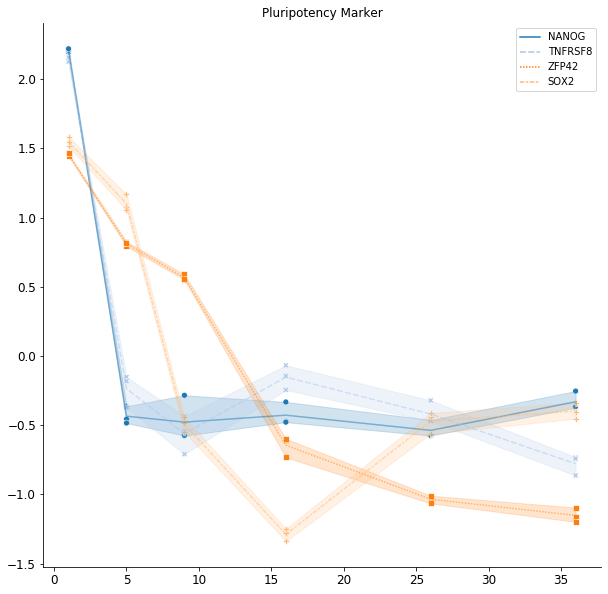

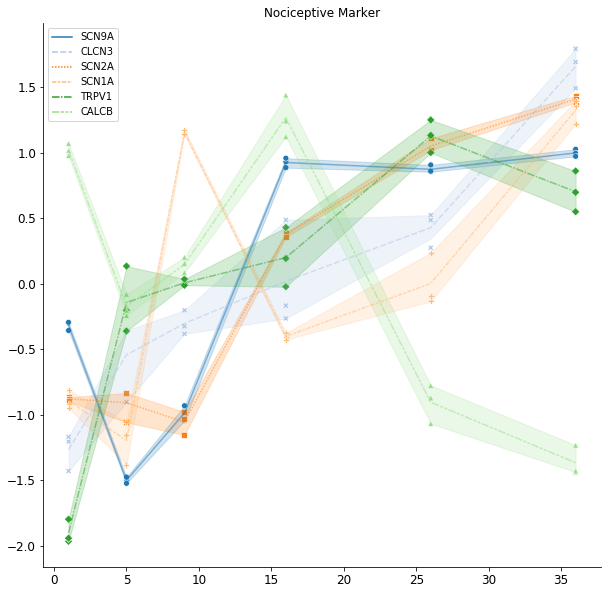

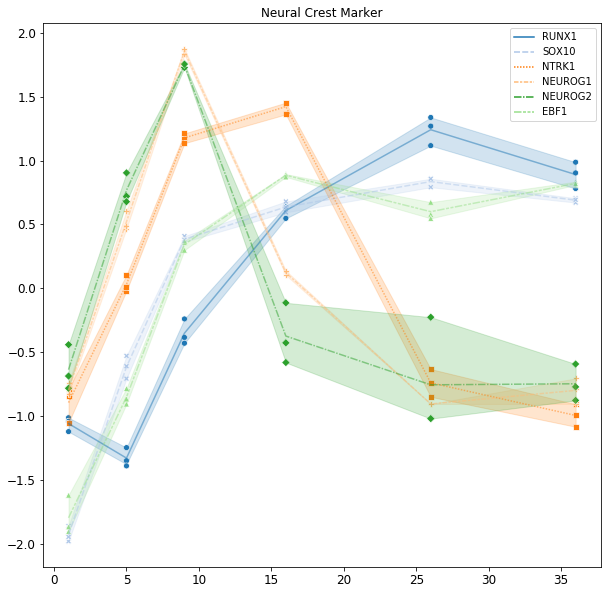

In [10]:
# here we draw the potential plots of gene after z-score normalization
#select marker of interest to draw
nociceptor_marker = [ "CALCB", "CALCA", "TRPV1", "SCN1A", "SCN2A", "SCN9A", "CLCN3"]
pluripotency_marker = ["SOX2", "POU5F1", "NANOG", "ZFP42", "TNFRSF8"]
neural_crest_marker = [ "NEUROG1", "NEUROG2", "SOX10", "EBF1", "TFAP2", "NTRK1", "RUNX1"]


def draw_curves(df, genes_liste, title):
    
    """trajectory input, marker input, and the title of the marker
    draws the plot"""
    df_curv = df.reset_index().set_index("external_gene_name").iloc[:, 3:-1]
    df_curv.columns = [
        1, 1, 1, 5, 5, 5, 9, 9, 9, 16, 16, 16, 26, 26, 26, 36, 36, 36
    ]
    df_curves = df_curv[df_curv.index.isin(genes_liste)]
    sns.despine()
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=df_curves.T,
                    hue=df_curves.index,
                    palette="tab20",
                    legend=False)
    sns.lineplot(data=df_curves.T, alpha=0.5, palette="tab20"),
    plt.title(title)
    #plt.savefig(title + "_gene_expression_marker.svg",
    #            quality=90,
    #           dpi=600,
    #            transparent=True,
    #            bbox_inches="tight")


draw_curves(supercluster_mrna, pluripotency_marker, "Pluripotency Marker")
draw_curves(supercluster_mrna, nociceptor_marker, "Nociceptive Marker")
draw_curves(supercluster_mrna, neural_crest_marker, "Neural Crest Marker")

<Figure size 432x288 with 0 Axes>

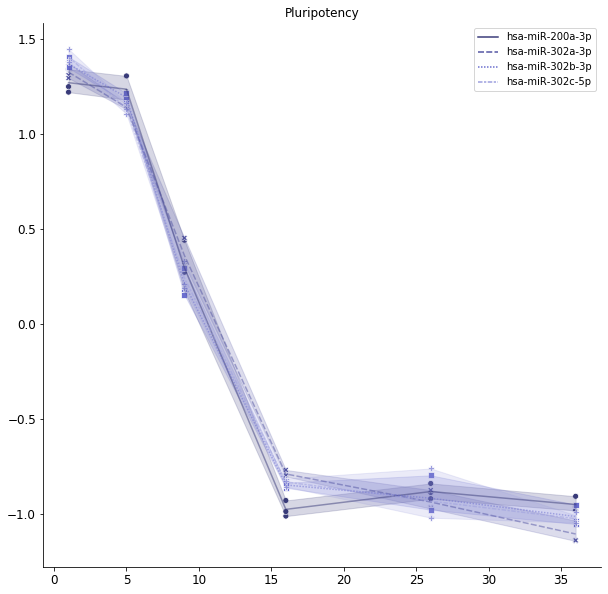

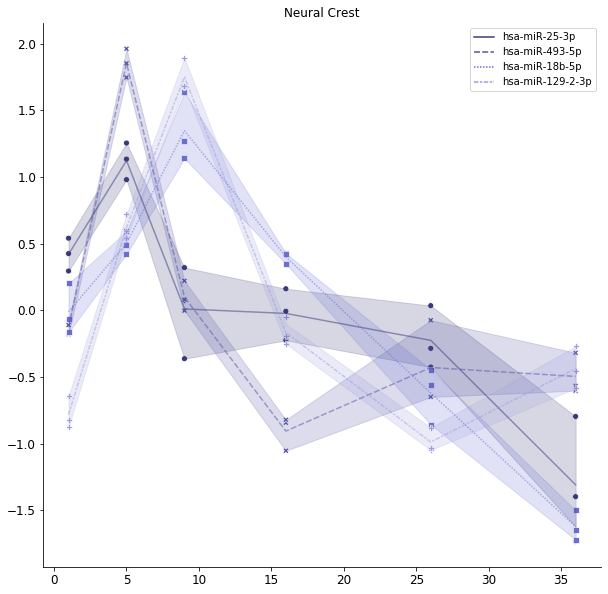

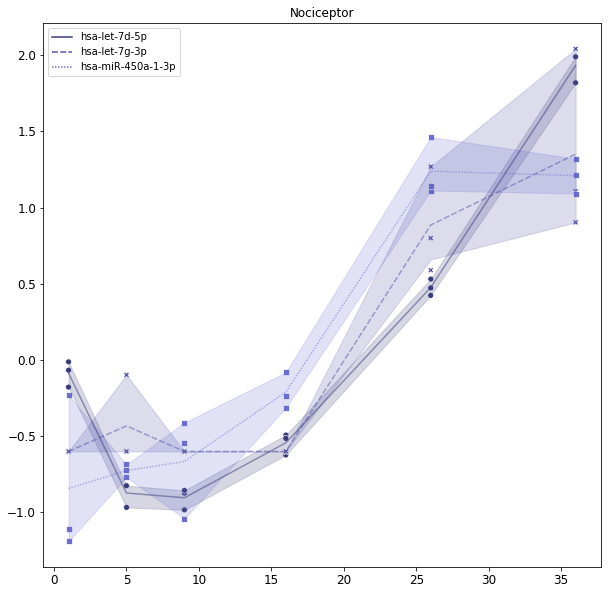

In [11]:
# miRNA expression data is used for plotting marker miRNAs 
#plot the miRNA data for queried selected miRNAs

pluripotency_mirna = [ "hsa-miR-302a-3p", "hsa-miR-200a-3p", "hsa-miR-302b-3p", "hsa-miR-302c-5p"]
neural_crest_mirna = [ "hsa-miR-25-3p", "hsa-miR-493-5p", "hsa-miR-18b-5p", "hsa-miR-129-2-3p"]
nociceptor_mirna = ["hsa-let-7d-5p", "hsa-let-7g-3p", "hsa-miR-450a-1-3p"]


def draw_curves_mirna(df, mirna_liste, title):
    """same as for genes, draw miRNA marker"""
    df_curv = df.reset_index().set_index("Row.names").iloc[:, 2:-1]
   
    df_curv.columns = [1, 1, 1, 5, 5, 5, 9, 9, 9, 16, 16, 16, 26, 26, 26, 36, 36, 36 ] # set column

    df_curves = df_curv[df_curv.index.isin(mirna_liste)]# check if the miRNA is in the list

    sns.despine() # get rid of axis spines
    
    #drawing
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=df_curves.T,
                    hue=df_curves.index,
                    palette="tab20b",
                    legend=False)
    sns.lineplot(data=df_curves.T, alpha=0.5, palette="tab20b"),
    plt.title(title)
    #plt.savefig(title + "_mirna_expression_marker.svg",
    #            quality=90,
    #            dpi=600,
    #            transparent=True,
    #            bbox_inches="tight")


draw_curves_mirna(supercluster_mirna, pluripotency_mirna, "Pluripotency")
draw_curves_mirna(supercluster_mirna, neural_crest_mirna, "Neural Crest")
draw_curves_mirna(supercluster_mirna, nociceptor_mirna, "Nociceptor")

In [16]:
# get top enriched miRNAs per cluster

gesamt_expression = pd.merge(supercluster_mirna,
                             baseline_expression,
                             how="left",
                             left_on="Row.names",
                             right_on="Row.names")


def top10_mirnas_cluster(df, cluster):
    """ get the top 5 mirnas per cluster"""
    expression = pd.DataFrame()

    for i in [3, 4, 5, 2, 1]:
        df_express = df[df[cluster] == i].sort_values(["baseMean"],
                                    ascending=False).set_index("Row.names").iloc[:5, 1:-2]
        expression = pd.concat([expression, df_express])

    return expression


top_expressed = top10_mirnas_cluster(gesamt_expression, "hierachical_cluster")

top_expressed

,cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Row.names,,,,,,,,,,,,,,,,,,,
hsa-miR-302a-5p,purple,1.231850,1.266984,1.283141,1.310616,1.318026,1.287395,0.218814,0.212831,0.222547,-0.832186,-0.807359,-0.762852,-0.986741,-0.992008,-0.846440,-1.114272,-1.066750,-0.943596
hsa-miR-148a-3p,yellow,1.234518,1.409521,1.550345,0.408349,0.076436,0.410510,-1.255439,-1.025078,-0.862713,-1.115616,-1.380916,-0.978632,-0.143910,0.099909,0.335575,0.210975,0.710219,0.315946
hsa-miR-302b-3p,purple,1.406370,1.347568,1.351999,1.166256,1.196831,1.213371,0.295650,0.154393,0.185730,-0.833470,-0.860235,-0.843379,-0.975877,-0.975888,-0.794892,-1.050766,-1.034964,-0.948698
hsa-miR-92b-3p,cyan,1.165634,1.160917,1.279328,1.420809,1.422027,1.319430,0.035728,0.168770,0.132022,-0.655339,-0.641877,-0.665892,-1.030472,-1.002936,-0.912779,-1.175016,-0.999036,-1.021318
hsa-miR-302d-3p,purple,1.343618,1.279431,1.261369,1.141555,1.167164,1.184785,0.462195,0.326454,0.326561,-0.754149,-0.780761,-0.787126,-0.977198,-0.963400,-0.872382,-1.171261,-1.141482,-1.045375
hsa-miR-25-3p,red,0.295285,0.425717,0.541435,1.255285,1.134654,0.980230,-0.362453,0.321090,0.074173,-0.223979,-0.006577,0.162448,-0.284604,-0.424790,0.035697,-1.731545,-0.795202,-1.396866
hsa-miR-92a-3p,red,0.121032,0.164209,0.299368,1.195069,1.089612,0.974254,0.797804,1.002016,0.989058,0.291804,0.319232,0.409964,-1.208900,-1.235112,-1.007902,-1.565371,-1.252240,-1.383898
hsa-miR-106b-3p,red,0.259529,0.610674,0.731767,1.299360,1.095514,1.293592,-0.351342,0.095784,-0.181140,-0.009082,0.142486,0.528993,-1.061173,-0.966819,-0.645754,-1.266684,-0.535157,-1.040546
hsa-miR-151a-3p,red,-1.019133,-0.879355,-0.317762,0.923591,0.355130,1.055744,-0.519344,0.036210,-0.106479,-0.052585,0.092421,0.682902,-0.222697,-0.072468,0.492743,-0.504359,0.340722,-0.285281


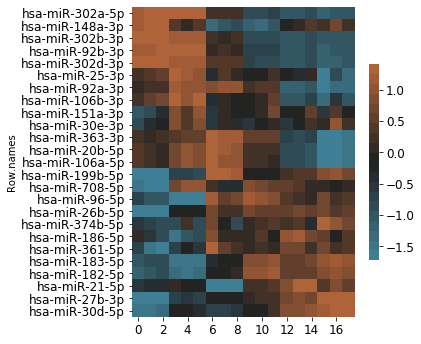

In [20]:
# draw the heatmaps
fig, ax = plt.subplots(figsize=(5, 18))
sns.heatmap(top_expressed.iloc[:,1:],
            square=True,
            robust=True,
            cbar_kws={"shrink": 0.2},
            cmap=sns.diverging_palette(222, 30, l=50, n=20, center="dark"))
#plt.savefig("top5_expressed_miRNAs_cluster.svg",
#            quality=90,
#            transparent=True,
#            dpi=600,
#            bbox_inches="tight")